# Validating Bond Issue Totals

To give us some confidence n the comprehensiveness of our bond issue data, we are trying to partially validate said data against Census debt totals.

In [21]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from IPython.display import Image

## Data Input

Let's read in the data so we can compare the debt volume totals to Census data.

In [19]:
#Read in data
bonds=pd.read_csv('bonds.csv',index_col=['DomicileNationName'])

#Subset to US
bonds_us=bonds.ix[['-','United States']].reset_index()

#Create datetime date variable
bonds_us['date']=bonds_us['Issue\nDate'].apply(lambda x: pd.to_datetime(x))

#Create year variable
bonds_us['year']=bonds_us['Issue\nDate'].apply(lambda x: pd.to_datetime(x).year)

def str2flt(x):
    try:
        return float(x.replace(',',''))
    except:
        print x,' >> 0\n'
        return 0.

#Create numeric principal amount variable
bonds_us['princ_amt']=bonds_us['Principal \nAmt - in \nthis Mkt \n($ mil)'].apply(lambda x: str2flt(x))

[var for var in bonds_us.columns]

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0

-  >> 0



['DomicileNationName',
 'Issue\nDate',
 'Issuer',
 'TF Macro Description',
 'TF Mid Description',
 'Target Market\nLong Description',
 'Issue\nType\nDescription',
 'Secur-\n ity\n Code',
 'Cur-\nrency',
 'Principal \nAmt - in \nthis Mkt \n($ mil)',
 'Offer\nPrice',
 'Proceeds \nAmt inc. \nOver Sold -\nin this Mkt\n($ mil)',
 'Proceeds\nAmt inc.\nOver Sold-\nin this Mkt\n(Host mil)',
 'Total \nAmt on \nProspectus\n(US Mil,\n Global)',
 'Coupon\n (%)',
 'Maturity',
 "Stan-\ndard\n &\nPoor's\nRating",
 'Moody\nRating',
 'Spread\n  to\nBench-\nMark',
 'Bookrunner(s)',
 'Number\nof\nBookrunners\nby\nUnique\nParents',
 'All Managers',
 'All Managers\nRole Description',
 'Gross Spread\nas % of \nPrncpl Amt -\nin this Mkt',
 'Gross \nSpread - \nin this \nMkt ($ mil)',
 'date',
 'year',
 'princ_amt']

Here are the debt totals from 2013.  Since our data aren't on the fiscal year, we are just looking for rough correspondence in orders of magnitude.  Note the dollars in the table below are in $000s.

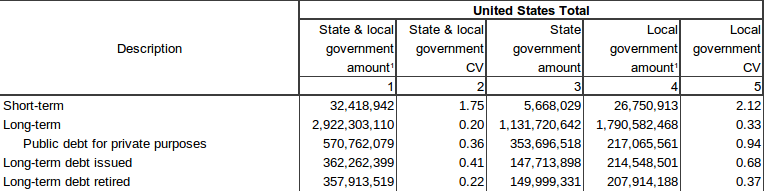

In [22]:
Image('2013_GFS_debt.png')

And what is the volume represented in our data (which are in $M)?

In [24]:
bonds_us[bonds_us['year']==2013]['princ_amt'].sum()

24811.04000000003

Hmmmmm.  Hopefully there is something I don't understand about these data.